In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
###READ CSV INTO PD DATAFRAME
zebra = pd.read_csv('Resources/collecting_zebra.csv')
zebra

,Date,Year,Temp,ToBottom,ToBottomNum,TowLength,VolConc,VolSubSample,TotalCount,Diameter,Density
0,5/18/94,1994,10.5,False,0,7.5,50.0,50.0,0,13,0
1,5/23/94,1994,9.3,False,0,5.0,50.0,50.0,0,13,0
2,5/23/94,1994,16.9,False,0,5.0,50.0,50.0,0,13,0
3,5/23/94,1994,12.3,False,0,5.0,50.0,50.0,0,13,0
4,5/24/94,1994,10.0,False,0,6.0,50.0,50.0,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...
3037,5/30/13,2013,15.6,False,0,3.0,31.0,31.0,0,13,0
3038,6/21/13,2013,16.6,False,0,10.0,46.0,3.0,14,13,323
3039,6/21/13,2013,16.4,False,0,10.0,47.0,3.0,71,13,1676
3040,6/25/13,2013,16.7,False,0,10.0,46.0,46.0,4,13,6


In [41]:
###ASSIGN DATA TO THE VARIABLES
X = zebra[["Temp","TowLength"]]
y = zebra["TotalCount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(3042, 2) (3042, 1)


In [42]:
###SPLIT DATA INTO TRAINING AND TESTING
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
###CREATE MODEL TO FIT TO TRAINING DATA
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [44]:
###TRANSFORM BOTH TRAINING AND TESTING
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [45]:
###CREATE MODEL AND FIT IT TO THE TRAINING DATA
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [46]:
###MAKE PREDICTIONS USED TO SCALE TEST DATA
predictions = model.predict(X_test_scaled)

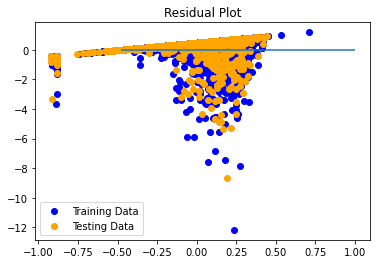

In [47]:
###PLOT THE RESIDUAL PLOT
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=1)
plt.title("Residual Plot")
plt.show()

In [48]:
###CALCULATE MSE and R^2 
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9519176800096587, R2: 0.04831057920728621


In [49]:
###USE RIDGE MODEL FOR REGULARIZATION
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9519176141292097, R2: 0.04831064507193772
